# Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm

# Data gathering and Primary visualization

In [2]:
df=pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
print('shape of the data :',df.shape)

shape of the data : (18249, 14)


If there is any duplicates we can remove them now.

In [5]:
print('total number of duplicate values : ',sum(df.duplicated()))

total number of duplicate values :  0


So we do not have to drop any row or column and we can proceed to the next step.

# Train and validation data

As we are predicting the price of the avocados we are going to put the prices column in the Y and rest of the data in X

In [6]:
X=df.drop('AveragePrice',1)
y=df['AveragePrice']

In [7]:
print('shape of X and y respectively :',X.shape,y.shape)

shape of X and y respectively : (18249, 13) (18249,)


As the dataset is medium in size we can perform a 80-20 train test split over the dataset.

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [9]:
print('shape of X and y respectively(train) :',X_train.shape,y_train.shape)
print('shape of X and y respectively(test) :',X_test.shape,y_test.shape)

shape of X and y respectively(train) : (14599, 13) (14599,)
shape of X and y respectively(test) : (3650, 13) (3650,)


In [10]:
cols=X_train.columns

# Preprocessing

#### Encoding

In [11]:
scaler=LabelEncoder()

In [12]:
for col in X_train.columns:
    if df[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [13]:
X_train.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
14902,2,154,1797.04,28.34,552.03,0.00,1216.67,264.39,952.28,0.00,1,2017,3
7537,13,143,362296.15,97772.92,104336.09,14152.16,146034.98,92339.30,52994.80,700.88,0,2017,36
9720,22,29,12801.03,11536.00,337.16,0.00,927.87,927.87,0.00,0.00,1,2015,11
2105,25,26,550810.62,161220.26,305122.62,17131.92,67335.82,67335.82,0.00,0.00,0,2015,40
18083,2,166,8634.75,2317.50,3561.20,0.00,2756.05,2752.63,3.42,0.00,1,2018,40


In [14]:
scaler=VarianceThreshold(0.1)

In [15]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
print('shape of X (train) :',X_train.shape)
print('shape of X (test) :',X_test.shape)

shape of X (train) : (14599, 13)
shape of X (test) : (3650, 13)


Now we have found that every single  column is useful for predicting the data

#### Scaling

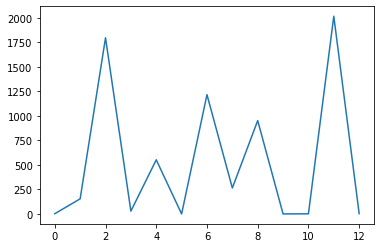

In [17]:
plt.plot(X_train[0])

This graph shows that the every single feature has different value ranges. So we need to scale the data for better performances.

In [18]:
scaler=StandardScaler()


In [19]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [20]:
print("Type of X_train :",type(X_train))
print("Type of X_test :",type(X_test))

Type of X_train : <class 'numpy.ndarray'>
Type of X_test : <class 'numpy.ndarray'>


In [21]:
X_train=pd.DataFrame(X_train,columns=cols)
X_train.head()
X_test=pd.DataFrame(X_test,columns=cols)
X_test.head()

,Unnamed: 0,Date,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,-1.369115,-0.735660,-0.244631,-0.229176,-0.242334,-0.214369,-0.242536,-0.245279,-0.216549,-0.177445,1.007080,-1.218764,-1.634131
1,0.046012,-1.185734,-0.189818,-0.226356,-0.143668,-0.085100,-0.188836,-0.203317,-0.133165,-0.107003,-0.992969,-1.218764,-0.479388
2,1.010872,-0.428790,0.061641,-0.146391,0.051818,-0.124087,0.358279,0.102441,1.144522,-0.177445,1.007080,-0.158916,1.573490
3,-0.532903,1.146472,-0.243018,-0.230010,-0.240243,-0.214369,-0.238336,-0.242477,-0.208167,-0.177445,1.007080,0.900933,-1.120912
4,-0.918847,1.514715,-0.241159,-0.229041,-0.241291,-0.207405,-0.232473,-0.230435,-0.221276,-0.177445,1.007080,1.960781,1.701795


In [22]:
print('Type of X_train and X_test :',type(X_train),type(X_test))

Type of X_train and X_test : <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


Now we can start the prediction.

In [23]:
actr=[]
acts=[]
lstr=[]
lsts=[]

### Polynomial Regression

In [24]:
loss=[]
val_loss=[]

In [25]:
for i in range(2,5):
  clf=make_pipeline(PolynomialFeatures(i),LinearRegression())
  clf.fit(X_train,y_train)
  y_pr=clf.predict(X_test)
  y_x=clf.predict(X_train)
  loss.append(mean_squared_error(y_train,y_x))
  val_loss.append(mean_squared_error(y_test,y_pr))

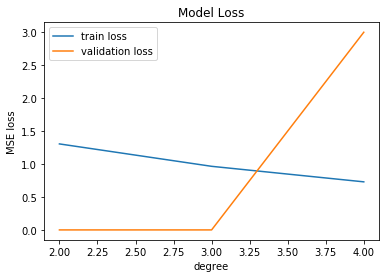

In [26]:
plt.title('Model Loss')
plt.xlabel('degree')
plt.ylabel('MSE loss')
plt.plot(range(2,5),loss/np.mean(loss),label='train loss')
plt.plot(range(2,5),val_loss/np.mean(val_loss),label='validation loss')
plt.legend()
plt.show()

In [27]:
print('Train loss and validation loss of the polynomial function model :',loss[1],'and',val_loss[1])

Train loss and validation loss of the polynomial function model : 0.059414527055949254 and 0.08888788356086554


In [28]:
clf=make_pipeline(PolynomialFeatures(3),LinearRegression())
clf.fit(X_train,y_train)
print('train accuracy :',clf.score(X_train,y_train))
print('test accuracy :',clf.score(X_test,y_test))

train accuracy : 0.6330650765627859
test accuracy : 0.45429578868522197


## Linear Regression

In [29]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(loss[1])
lsts.append(val_loss[1])

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lm=LinearRegression()

In [32]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
y_tr1 = lm.predict(X_train)

In [34]:
y_pr=lm.predict(X_test)

In [35]:
print('train data accuracy :',lm.score(X_train,y_train))
print('test data accuracy :',lm.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.44070827868644286
test data accuracy : 0.4506438884292138
loss of train data : 0.09056116217250366
loss of test data : 0.08948272904309088


In [36]:
actr.append(lm.score(X_train,y_train))
acts.append(lm.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

### Random Forest Regression

In [37]:
clf=RandomForestRegressor(random_state=0)

In [38]:
clf.fit(X_train,y_train)
y_tr1=clf.predict(X_train)
y_pr=clf.predict(X_test)

print('train data accuracy :',clf.score(X_train,y_train))
print('test data accuracy :',clf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.9870696087994129
test data accuracy : 0.9043277549814706
loss of train data : 0.002093703893417357
loss of test data : 0.01558372319452054


So we can see the RFR really predicts the model very well and gives a quite accurate prediction.

In [39]:
actr.append(clf.score(X_train,y_train))
acts.append(clf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

# Model Evaluation & Conclusion

In [42]:
models=['Polynomial','Random Forest','Linear Regression']

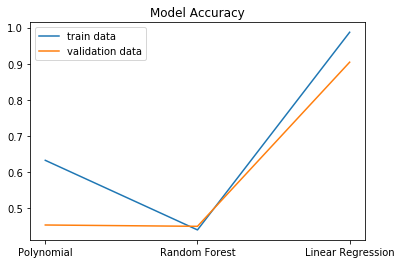

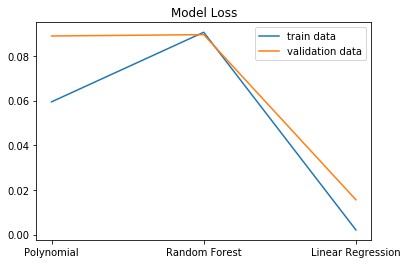

In [43]:
plt.title('Model Accuracy')
plt.plot(models,actr,label='train data')
plt.plot(models,acts,label='validation data')
plt.legend()
plt.show()

plt.title('Model Loss')
plt.plot(models,lstr,label='train data')
plt.plot(models,lsts,label='validation data')
plt.legend()
plt.show()

So, after visualizing , we have found that ,

                  Model performance :
                           Random Forest > Linear Regression > Polynomial Regression 